In [1]:
from statsmodels.datasets import get_rdataset
fisher = get_rdataset('iris')
fisher.data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
import pandas as pd
#eliminiamo la classe virginica
data = fisher.data.where(fisher.data.Species!='virginica').dropna()
#costruiamo un dataframe vuoto
df = pd.DataFrame()
#inserieamo le prime due feature e chiamiamole X e Y
df['X'] = data['Sepal.Length']
df['Y'] = data['Sepal.Width']
#inseriamo una colonna "C" che contenga le classi
df['C'] = data['Species']

data = df
data.head()

,X,Y,C
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


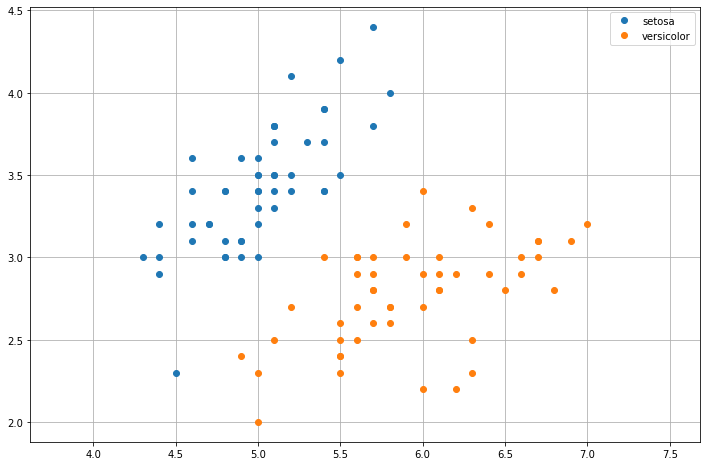

In [3]:
from matplotlib import pyplot as plt
def plot2d(data):
    classes = data['C'].unique()
    for c in classes:
        plt.plot(data.where(data['C']==c).dropna()['X'].values,
                 data.where(data['C']==c).dropna()['Y'].values,'o', label=c)

    plt.axis('equal')
    plt.grid()

plt.figure(figsize=(12,8))
plot2d(data)
plt.legend()
plt.show()

In [4]:
#importiamo SVC (Support Vector Classifier)
from sklearn.svm import SVC

#costruiamo il classificatore specificando un kernel lineare
#In questa fase impostiamo un parametro C alto in modo da penalizzare
#molto le variabili slack e ottenere un hard margin classico
svm = SVC(kernel='linear',C=100)
#allenaniamo il modello
svm.fit(data.drop(['C'], axis=1), data['C'])

SVC(C=100, kernel='linear')

In [5]:
print("Accuracy sul training set: %0.2f" % svm.score(data.drop(['C'], axis=1), data.C))

Accuracy sul training set: 1.00


In [6]:
print("Vettori di supporto:\n",svm.support_vectors_)
print("Coefficienti del problema duale:\n",svm.dual_coef_)

Vettori di supporto:
 [[5.5 3.5]
 [4.5 2.3]
 [4.9 2.4]
 [5.4 3. ]]
Coefficienti del problema duale:
 [[-15.44361663 -18.36202074  17.32736257  16.47827481]]


In [7]:
w = (svm.dual_coef_.T*svm.support_vectors_).sum(0)
print(w)

[ 6.31777572 -5.26481134]


In [8]:
print(svm.coef_)

[[ 6.31777572 -5.26481134]]


In [9]:
b = svm.intercept_
print(b)

[-17.32124155]


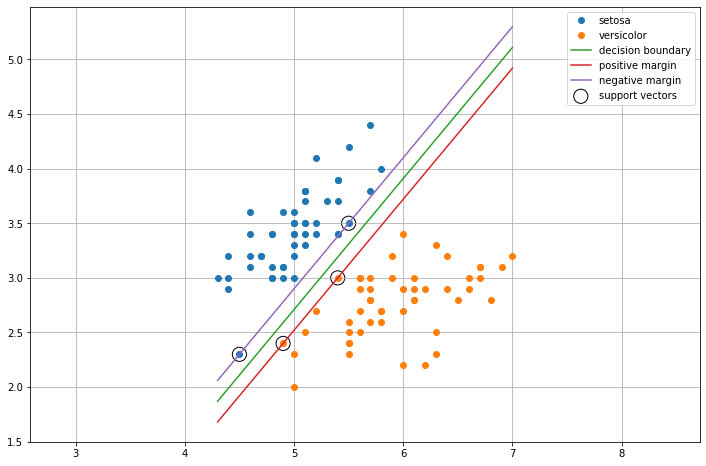

In [10]:
import numpy as np

def project(x,w,b):
    return -w[0]/w[1]*x-b/w[1]

def plot2dall(data,svm):
    w = (svm.dual_coef_.T*svm.support_vectors_).sum(0)
    b = svm.intercept_

    plot2d(data)

    plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], 200,
                facecolors='none',edgecolors='k', label='support vectors')

    x=np.array([data.X.min(),data.X.max()])

    plt.plot(x,project(x,w,b), label='decision boundary')
    plt.plot(x,project(x,w,b-1), label='positive margin')
    plt.plot(x,project(x,w,b+1), label='negative margin')

plt.figure(figsize=(12,8))
plot2dall(data,svm)
plt.legend()
plt.show()

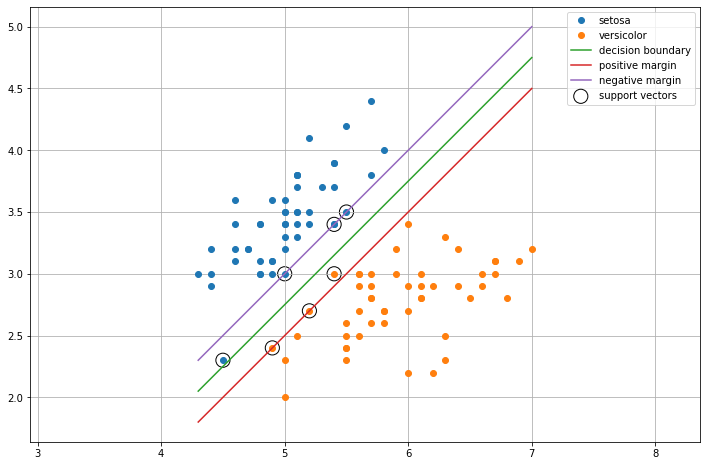

In [12]:
svm = SVC(kernel='linear',C=10)
svm.fit(data.drop(['C'], axis=1), data.C)

plt.figure(figsize=(12,8))
plot2dall(data,svm)
plt.legend()
plt.show()

In [13]:
rings = pd.read_csv('rings.csv')
rings.head()

,X,Y,C
0,-9.929224,-5.783568,-1
1,4.384001,9.712273,-1
2,5.670451,2.599445,-1
3,-0.729728,-4.303122,-1
4,-22.451126,1.430808,-1


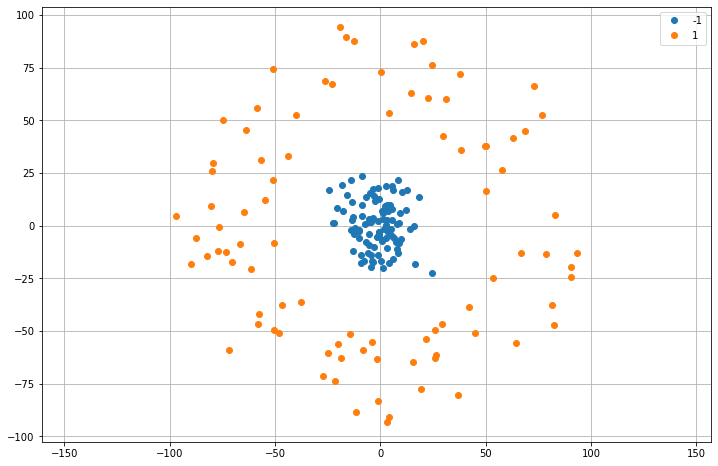

In [14]:
plt.figure(figsize=(12,8))
plot2d(rings)
plt.legend()
plt.show()

In [15]:
svm = SVC(kernel='linear',C=10)
svm.fit(rings.drop(['C'],axis=1),rings['C'])

SVC(C=10, kernel='linear')

Accuracy su training set: 0.73


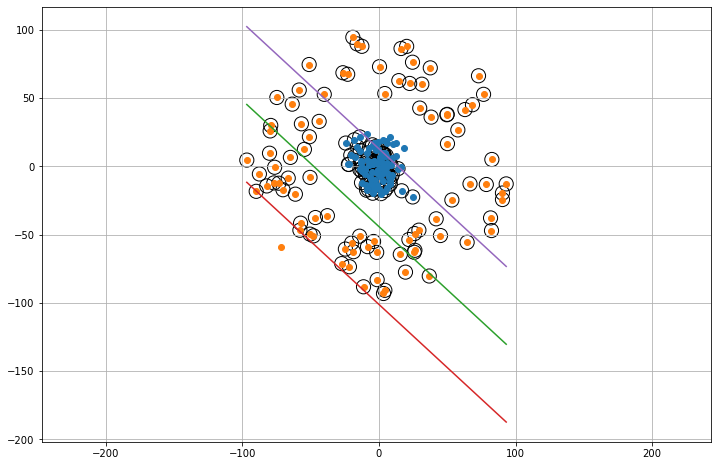

In [16]:
print("Accuracy su training set: %0.2f" % svm.score(rings.drop(['C'],axis=1),rings['C']))

plt.figure(figsize=(12,8))
plot2dall(rings,svm)
plt.show()

In [17]:
#copiamo il dataframe
rings3d = rings.copy()

s =35 # definiamo la varianza della gaussiana
rings3d['Z'] = np.exp(-((rings.X**2/(2*s**2))+(rings.Y**2/(2*s**2))))

#riordiniamo le colonne del dataframe
rings3d = rings3d[['X','Y','Z','C']]

rings3d.head()

,X,Y,Z,C
0,-9.929224,-5.783568,0.947533,-1
1,4.384001,9.712273,0.954712,-1
2,5.670451,2.599445,0.984243,-1
3,-0.729728,-4.303122,0.992255,-1
4,-22.451126,1.430808,0.813368,-1


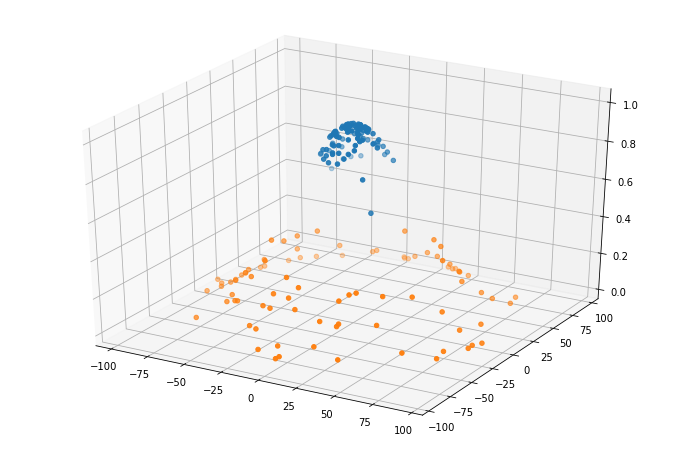

In [18]:
def plot3d(data):
    classes = data['C'].unique()
    for c in classes:
        X = data.where(data['C']==c)['X'].values
        Y = data.where(data['C']==c)['Y'].values
        Z = data.where(data['C']==c)['Z'].values
        plt.gca().scatter(X,Y,Z, label=c)

    plt.grid()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
plot3d(rings3d)
plt.show()

In [19]:
svm = SVC(kernel='linear')
svm.fit(rings3d.drop(['C'],axis=1),rings3d['C'])
print("Accuracy di training: %0.2f" % svm.score(rings3d.drop(['C'],axis=1),rings3d['C']))

Accuracy di training: 1.00


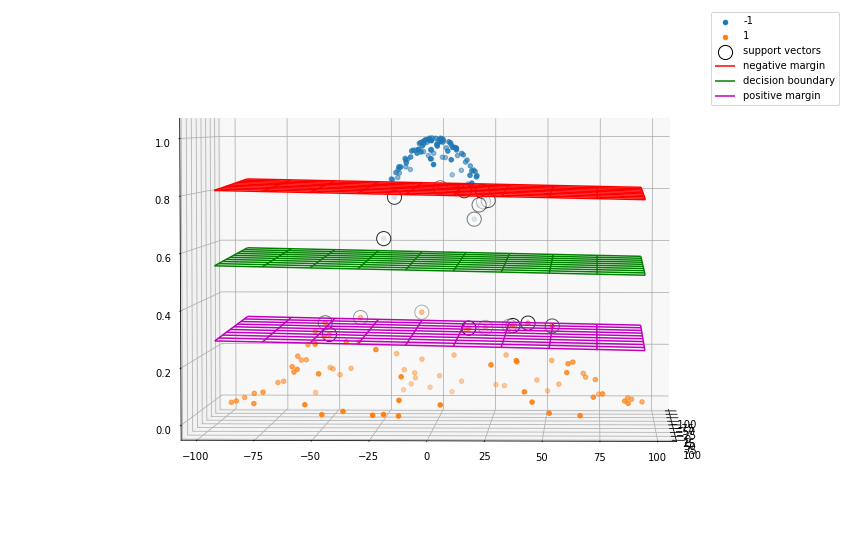

In [24]:
%matplotlib inline
def project3d(x,y,w,b):
    return -w[0]/w[2]*x -w[1]/w[2]*y - b/w[2]

def plot3dall(data,svm):
    w = (svm.dual_coef_.T*svm.support_vectors_).sum(0)
    b = svm.intercept_

    plot3d(data)

    plt.gca().scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], svm.support_vectors_[:,2], s=200,
                      facecolor='w' ,edgecolors='k', label='support vectors')

    x,y = np.meshgrid(np.linspace(data.X.min(),data.X.max(),10),np.linspace(data.Y.min(),data.Y.max(),10))
    
    z1 = project3d(x,y,w,b+1)
    z2 = project3d(x,y,w,b)
    z3 = project3d(x,y,w,b-1)
    
    plt.gca().plot_wireframe(x,y,z1,label='negative margin', color='r')
    plt.gca().plot_wireframe(x,y,z2,label='decision boundary', color='g')
    plt.gca().plot_wireframe(x,y,z3,label='positive margin',color='m')


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plot3dall(rings3d,svm)
plt.legend()
ax.view_init(azim=2, elev=3)
plt.show()

In [25]:
#costruiamo una griglia regolare di punti 2D:
X, Y = np.meshgrid(np.linspace(rings3d.X.min(),rings3d.X.max(),100),np.linspace(rings3d.Y.min(),rings3d.Y.max(),100))

#calcoliamo i rispettivi valori di Z applicando la transformazione
Z = np.exp(-((X**2/(2*s**2))+(Y**2/(2*s**2))))

XYZ = np.array([X.ravel(), Y.ravel(), Z.ravel()]) #trasformiamo i punti in una lista 3 x n

#valutiamo la funzione di decisione nei punti X, Y, Z:
w = svm.coef_[0]
b = svm.intercept_
f = w.T.dot(XYZ)+b
#transformiamo i valori in una matrice 100 x 100
F = f.reshape(X.shape)

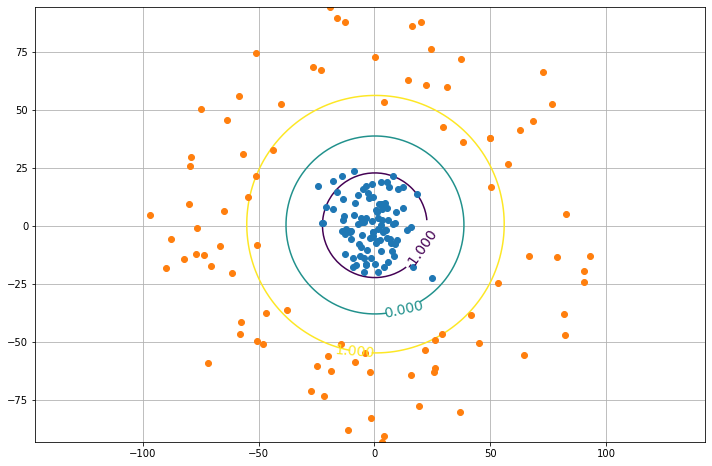

In [26]:
plt.figure(figsize=(12,8))
plot2d(rings)
contour=plt.contour(X,Y,F, levels=[-1,0,1])
plt.clabel(contour, fontsize=14)
plt.show()

In [27]:
svm = SVC(kernel='rbf', gamma=0.0001)
svm.fit(rings.drop(['C'],axis=1),rings.C)
print("Accuracy su training set: %0.2f" % svm.score(rings.drop(['C'],axis=1),rings.C))

Accuracy su training set: 1.00


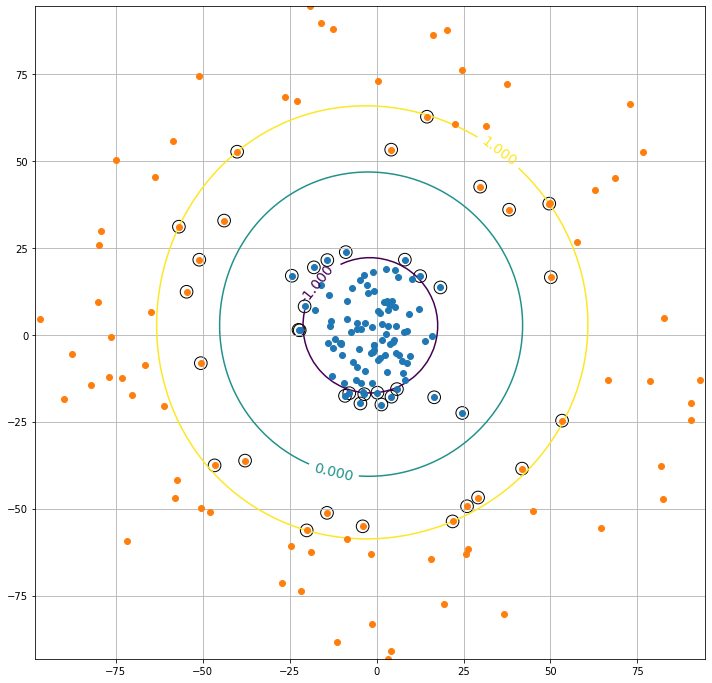

In [28]:
def plot2dcontour(data,svm):
    #costruiamo una griglia regolare di punti 2D:
    X, Y = np.meshgrid(np.linspace(data.X.min(),data.X.max(),100),np.linspace(data.Y.min(),data.Y.max(),100))
        
    #invece di calcolare i valori della funzione di decisione a mano, 
    #richiamiamo la funzione di decisione dell'oggeto svm
    F = svm.decision_function(np.c_[X.ravel(), Y.ravel()])
    F = F.reshape(X.shape)

    plot2d(data)
    contour=plt.contour(X,Y,F, levels=[-1,0,1])
    plt.clabel(contour, fontsize=14)
    
    plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], 160,
                facecolors='none',edgecolors='k', label='support vectors')
    

plt.figure(figsize=(12,12))
plot2dcontour(rings,svm)
plt.show()

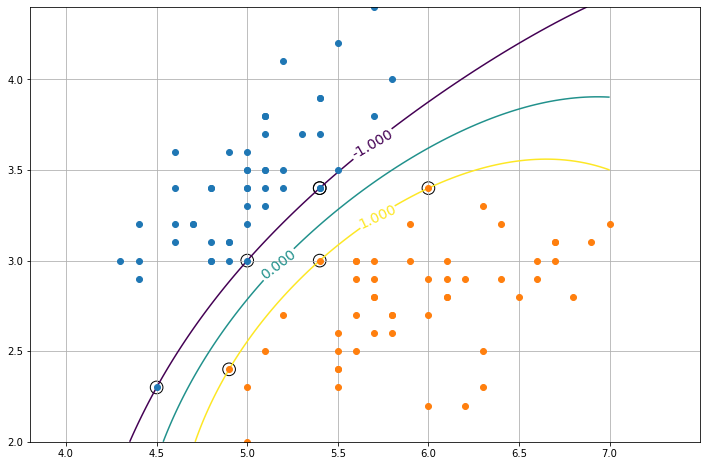

Accuracy su training set: 1.00


In [29]:
import pandas as pd
#eliminiamo la classe virginica
data = fisher.data[fisher.data['Species']!='virginica'].dropna()
#costruiamo un dataframe vuoto
df = pd.DataFrame()
#inserieamo le prime due feature e chiamiamole X e Y
df['X'] = data['Sepal.Length']
df['Y'] = data['Sepal.Width']
#inseriamo una colonna "C" che contenga le classi
df['C'] = data['Species']

data = df

#utilizziamo C=100 per ottenere un hard margin
svm = SVC(kernel='rbf', C=100, gamma='scale') #gamma default 'scale' = 1 / (n_features * X.var())
svm.fit(data.drop(['C'],axis=1),data['C'])

plt.figure(figsize=(12,8))
plot2dcontour(data,svm)
plt.show()
print("Accuracy su training set: %0.2f" % svm.score(data.drop(['C'],axis=1),data['C']))